In [9]:
import numpy as np
import pandas as pd

In [10]:
np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [11]:
#method pelatihan
def lvq_train(X, y, a, b, max_ep):
    c, train_idx = np.unique(y, True)
    W = X[train_idx].astype(np.float64)
    train = np.array([e for i, e in enumerate(zip(X, y)) if i not in train_idx])
    X = train[:, 0]
    y = train[:, 1]
    ep = 0
    
    while ep < max_ep:
        for i, x in enumerate(X):
            d = [sum((w-x)**2) for w in W]
            min = np.argmin(d)
            s = 1 if y[i] == c[min] else -1
            W[min] += s * a*(x - W[min])
        a *= b
        ep += 1
    return W, c

#method uji
def lvq_test(x, W):
    W, c = W
    d = [sum((w-x)**2) for w in W]
    return c[np.argmin(d)]

In [12]:
!wget -O heart.csv https://raw.githubusercontent.com/wmans12/optimasi/main/heart.csv
!wget -O datauji.csv https://raw.githubusercontent.com/wmans12/optimasi/main/datauji.csv

--2022-06-03 09:17:56--  https://raw.githubusercontent.com/wmans12/optimasi/main/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9156 (8.9K) [text/plain]
Saving to: ‘heart.csv’

heart.csv           100%[===================>]   8.94K  --.-KB/s    in 0s      

2022-06-03 09:17:56 (55.0 MB/s) - ‘heart.csv’ saved [9156/9156]

--2022-06-03 09:17:56--  https://raw.githubusercontent.com/wmans12/optimasi/main/datauji.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1957 (1.9K) [text/plain]
Saving to: ‘datauji.csv’

datauji.cs

In [13]:
#normalisasi dataset

file = pd.read_csv('heart.csv')
dataset = file.iloc[:,:10] 
label_kelas = file.iloc[:,13] 
dataset = dataset.apply(pd.to_numeric, errors='coerce')
dataset = dataset.fillna(dataset.mean())

kls = label_kelas.tolist()
data = dataset.values.tolist()

Q = np.array(data) #atribut
A = np.array(kls) #label kelas

#=======================================================
#ambil data uji

fileUji = pd.read_csv('datauji.csv')
dataUji = fileUji.iloc[:,:10] 

label_kelas_uji = file.iloc[:,13] 
dataUji = dataUji.apply(pd.to_numeric, errors='coerce')
dataUji = dataUji.fillna(dataUji.mean())

klsUji = label_kelas_uji.tolist()
dataUji = dataUji.values.tolist()

Q_Uji = np.array(dataUji)
A_Uji = np.array(klsUji)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """


------------------------- Hasil Klasifikasi dengan LVQ : ------------------------------


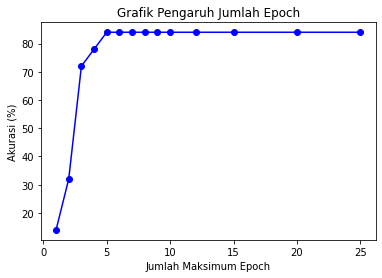

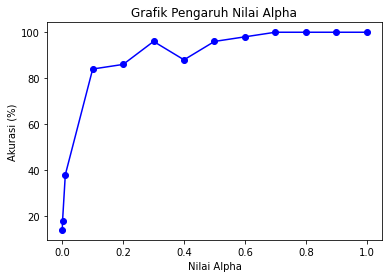

In [14]:
#====================== Pengujian Terhadap Jumlah Max Epoch ===================================
epoch = [1,2,3,4,5,6,7,8,9,10,12,15,20,25]
tingkatAkurasi1 = []
for x in epoch :
    a = .1
    b = .5
    w = lvq_train(Q, A, a, b, x)
    c = []
    betul = 0
    for i in range(len(dataUji)):
        c.append(lvq_test(Q_Uji[i],w))
        if (c[i] == A_Uji[i]):
            betul+=1
    akurasi = (betul/len(dataUji))*100
    tingkatAkurasi1.append(akurasi)

import matplotlib.pyplot as plt
print('------------------------- Hasil Klasifikasi dengan LVQ : ------------------------------')
plt.plot(epoch,tingkatAkurasi1, linestyle='-', marker='o', color='b')
plt.xlabel('Jumlah Maksimum Epoch')
plt.ylabel('Akurasi (%)')
plt.title('Grafik Pengaruh Jumlah Epoch')
plt.show()

#====================== Pengujian Terhadap Nilai Alpha ===================================
learingRate = [.0001,.001,.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
tingkatAkurasi2 = []

for x in learingRate :
    a = x
    b = .5
    w = lvq_train(Q, A, a, b, 10)
    c = []
    betul = 0
    for i in range(len(dataUji)):
        c.append(lvq_test(Q_Uji[i],w))
        if (c[i] == A_Uji[i]):
            betul+=1
    akurasi = (betul/len(dataUji))*100
    tingkatAkurasi2.append(akurasi)
    a+=a
    

plt.plot(learingRate,tingkatAkurasi2, linestyle='-', marker='o', color='b')
plt.xlabel('Nilai Alpha')
plt.ylabel('Akurasi (%)')
plt.title('Grafik Pengaruh Nilai Alpha')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """


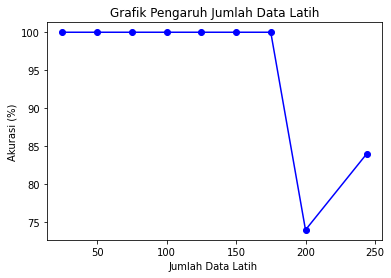

In [15]:
#====================== Pengujian Terhadap Jumlah Data Latih ===================================
jmlData = [25,50,75,100,125,150,175,200,244]
tingkatAkurasi4 = []

for x in jmlData :
    a = .1
    b = .5
    w = lvq_train(Q[0:x], A[0:x], a, b, 10)
    c = []
    betul = 0
    for i in range(len(dataUji)):
        c.append(lvq_test(Q_Uji[i],w))
        if (c[i] == A_Uji[i]):
            betul+=1
    akurasi = (betul/len(dataUji))*100
    tingkatAkurasi4.append(akurasi)
    a+=a

plt.plot(jmlData,tingkatAkurasi4, linestyle='-', marker='o', color='b')
plt.xlabel('Jumlah Data Latih ')
plt.ylabel('Akurasi (%)')
plt.title('Grafik Pengaruh Jumlah Data Latih')
plt.show()